In [ ]:
# This jupyter notebook is for COMP9517 lab03

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
from tensorflow import keras

In [9]:
# import the data set from keras
fashion_mnist = keras.datasets.fashion_mnist

In [8]:
# check the type of the fashion_mnist
type(fashion_mnist)

module

In [15]:
# Import date the the fanshion mnist
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

In [16]:
# check the length of. the training image and training labels
# If correct the data should be 60000
print(f"training images: {len(train_images)}")
print(f"training labels: {len(train_labels)}")

training images: 60000
training labels: 60000


In [17]:
# check the length of. the testing image and testing labels
# If correct the data should be 10000
print(f"testing images: {len(test_images)}")
print(f"testing labels: {len(test_labels)}")

testing images: 10000
testing labels: 10000


In [19]:
# check the shape of the training images
print(f"The shape of the training images: {train_images.shape}")
print(f"The shape of the testing images: {test_images.shape}")
print(f"The shape of the training labels: {train_labels.shape}")
print(f"The shape of the testing labels: {test_labels.shape}")

The shape of the training images: (60000, 28, 28)
The shape of the testing images: (10000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing labels: (10000,)


In [21]:
# Check the labels of data
# from 0 - 9, so there are 10 kind of things in the label
print(f"The minimum of the training labels: {np.min(train_labels)}")
print(f"The maximum of the training labels: {np.max(train_labels)}")

The minimum of the training labels: 0
The maximum of the training labels: 9


<function matplotlib.pyplot.show(close=None, block=None)>

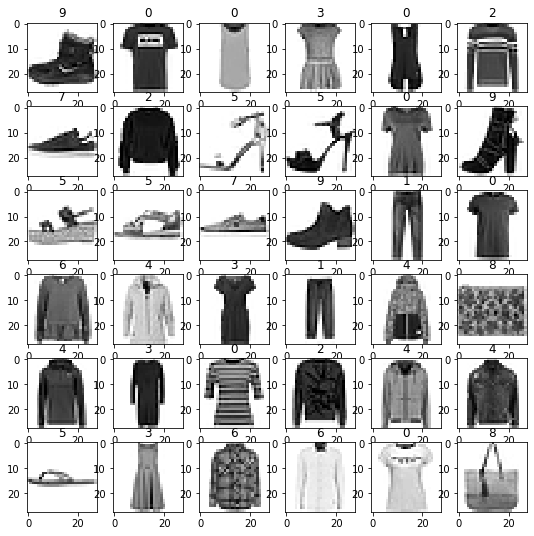

In [31]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# print the 6 * 6 sample image in the dataset
row = 6
col = 6
plt.figure(figsize = (6 * 1.5, 6 * 1.5))
for r in range(row):
    for c in range(col):
        current_index = col * r + c
        plt.subplot(row, col, current_index + 1)
        plt.imshow(train_images[current_index], cmap="binary", interpolation = "nearest")
        plt.title(class_names[train_labels[current_index]])
plt.show